# Create a marketing campaign from a product sketch of a Jet Backpack

Example of using the Gemini API to analyze a a product sketch (in this case, a drawing of a Jet Backpack), create a marketing campaign for it, and output taglines in JSON format.


## Setup

In [11]:
#!pip install -q -U google-generativeai
!pip install vertexai

# !gcloud



In [1]:
#from google.colab import userdata
import google.generativeai as genai
import PIL.Image
from IPython.display import display, Image
import ipywidgets as widgets
import base64
import vertexai

In [125]:
from IPython.display import display, Markdown

In [80]:
import http.client
import io
import typing
import urllib.request

import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps

Contents = str or list[str or Image or Part]

def load_image_from_url(image_url: str) -> Image:
    image_bytes = get_image_bytes_from_url(image_url)
    return Image.from_bytes(image_bytes)


def get_image_bytes_from_url(image_url: str) -> bytes:
    with urllib.request.urlopen(image_url) as response:
        response = typing.cast(http.client.HTTPResponse, response)
        image_bytes = response.read()
    return image_bytes

GenerationResponse=''
def print_responses(responses: list[GenerationResponse], as_markdown: bool = True):
    """Print the full responses."""
    # Consolidate the text
    text = "".join(
        part.text
        for response in responses
        for part in response.candidates[0].content.parts
    )
    # Remove potential leading/trailing spaces
    text = text.strip()

    print(" Start of responses ".center(80, "-"))
    if as_markdown:
        IPython.display.display(IPython.display.Markdown(text))
    else:
        print(text)
    print(" End of responses ".center(80, "-"))
    print("")

    
def print_contents(contents: Contents):
    """Print the full contents for ease of readability."""
    if not isinstance(contents, list):
        contents = [contents]

    print(" Contents ".center(80, "-"))
    for content in contents:
        if display_content_as_image(content):
            continue
        if display_content_as_video(content):
            continue
        print(content)

In [2]:
from google.cloud import aiplatform

In [3]:
from vertexai.preview.generative_models import GenerativeModel

In [4]:
#GOOGLE_API_KEY=userdata.get('API Key')
#genai.configure(api_key='APIkey')
#Pls update the API key
genai.configure(api_key='Your API Key')

## Marketing Campaign
- Product Name
- Description
- Feature List / Descriptions
- H1
- H2


In [154]:
model = genai.GenerativeModel(model_name='gemini-pro-vision')

# Analyze Product Sketch

In [155]:
productSketchUrl = "https://storage.googleapis.com/generativeai-downloads/images/jetpack.jpg"
!curl -o jetpack.jpg {productSketchUrl}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  2  349k    2  7564    0     0  11955      0  0:00:29 --:--:--  0:00:29 11968
100  349k  100  349k    0     0   460k      0 --:--:-- --:--:-- --:--:--  461k


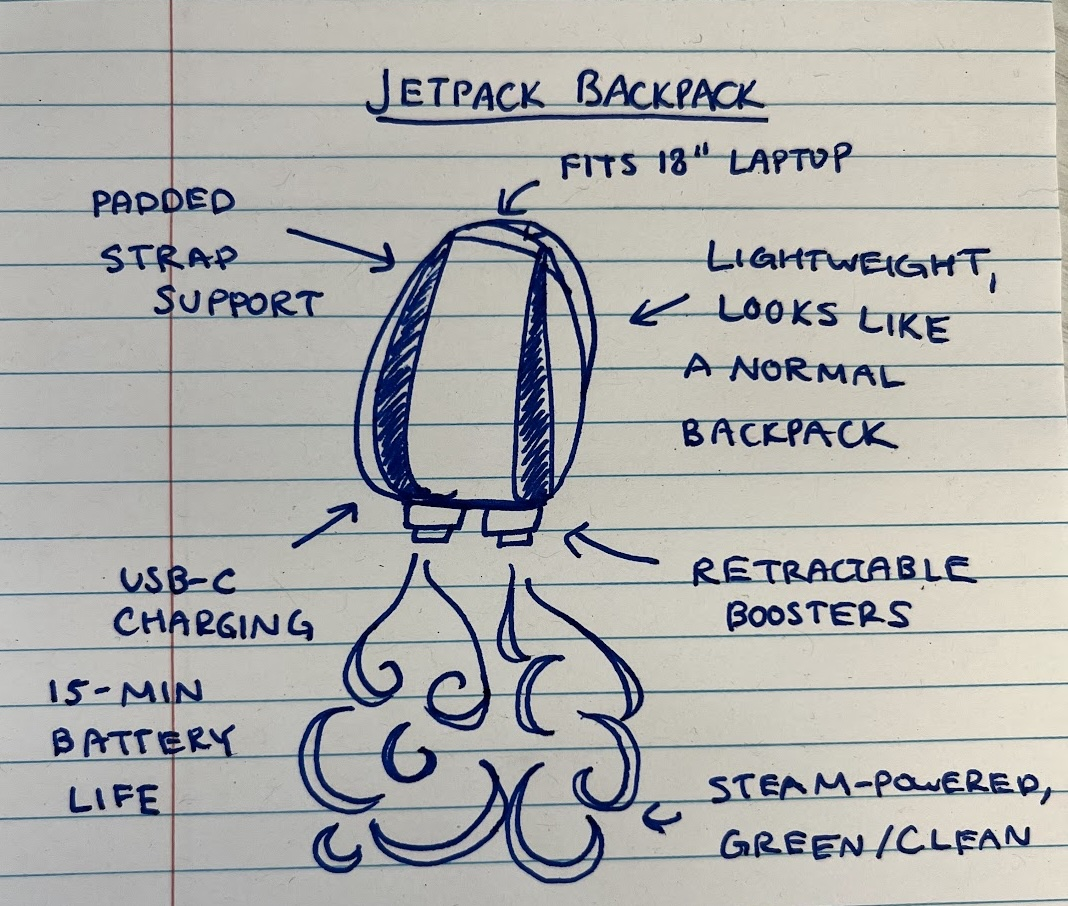

In [156]:
img = PIL.Image.open('jetpack.jpg')
#display(img('jetpack.jpg', width=300))
display(img)

In [157]:
analyzePrompt = """This image contains a sketch of a potential product along with some notes.
Given the product sketch, describe the product as thoroughly as possible based on what you
see in the image, making sure to note all of the product features. Return output in json format:
{description: description, features: [feature1, feature2, feature3]}"""

In [159]:
response = model.generate_content([analyzePrompt, img])

In [160]:
productInfo = eval(response.text)
#print(productInfo)
display(Markdown(response.text))

 {
 "description": "The Jetpack Backpack is a lightweight backpack that looks like a normal backpack but has retractable boosters that can be used to fly. It has a padded strap support, a USB-C charging port, and a 15-minute battery life. It also fits an 18-inch laptop.",
 "features": ["Retractable boosters", "USB-C charging", "15-minute battery life", "Fits 18-inch laptop", "Padded strap support", "Lightweight", "Looks like a normal backpack", "Steam-powered", "Green/clean"]
}

In [161]:
namePrompt = """You are a marketing whiz and writer trying to come up with a name for the
product shown in the image. Come up with ten varied, interesting possible names. Return the result
in array format, like this: ['name 1', 'name 2', ...]. Pay careful attention
to return a valid array in the format described above, and no other text.
The most important thing is that you stick to the array format."""

response = model.generate_content([namePrompt, img])



In [163]:
display(Markdown(response.text))

 ['Jetpack', 'SkyPack', 'ZoomPack', 'BoostPack', 'AirPack', 'FlyPack', 'SoarPack', 'GlidePack', 'PropelPack', 'RocketPack']

In [164]:
names = eval(response.text)

# Create a Dropdown widget to choose a name from the
# returned possible names
dropdown = widgets.Dropdown(
    options=names,
    value=names[0],  # default value
    description='Name:',
    disabled=False,
)
display(dropdown)

Dropdown(description='Name:', options=('Jetpack', 'SkyPack', 'ZoomPack', 'BoostPack', 'AirPack', 'FlyPack', 'S‚Ä¶

In [32]:
name = dropdown.value

In [166]:
model = GenerativeModel("gemini-1.5-flash-001")

In [167]:
product_name = "Jetpack"

prompt = f"""
  Generate a few social media posts about a new bag product, {product_name}
"""

print(f"Prompt: {prompt}")

Socialmediapost=model.generate_content(prompt).text


Prompt: 
  Generate a few social media posts about a new bag product, Jetpack



In [168]:
display(Markdown(Socialmediapost))

## Social Media Posts about Jetpack - A New Bag Product:

**Post 1 (Image: Close-up of Jetpack with vibrant color and unique design) **

**Headline:** Introducing Jetpack: Your new travel companion. ‚úàÔ∏è

**Body:** 
Tired of bulky bags and lost belongings? Jetpack is here to revolutionize your travel experience! 

This sleek and innovative bag is designed for comfort, functionality, and style. Explore its features:

‚úîÔ∏è  **Lightweight and durable** 
‚úîÔ∏è  **Spacious compartments for all your essentials**
‚úîÔ∏è  **Built-in security features for peace of mind** 
‚úîÔ∏è  **Unique design that turns heads**

Get ready to travel in style and comfort with Jetpack! [Link to website/store] #jetpack #travel #bag #adventure #newproduct #style #functional

**Post 2 (Video: Short and engaging showcasing Jetpack's features and benefits) **

**Headline:**  Jetpack: Your ultimate travel buddy.

**Body:** 
Travel with ease and style! Jetpack is the perfect bag for all your adventures, big or small. 

[Video showcasing Jetpack's unique features like expandable compartments, hidden pockets, and comfortable straps]

Ready to upgrade your travel game? 

Visit our website to explore the Jetpack collection and find the perfect companion for your next journey. [Link to website/store] #jetpack #travel #bag #adventure #newproduct #travelessentials

**Post 3 (Image: Person wearing Jetpack looking happy and confident while traveling) **

**Headline:**  Jetpack: Where style meets functionality.

**Body:** 
Travel shouldn't be a hassle. It should be an adventure! 

Jetpack combines style and functionality to elevate your travel experience. 

[Image of someone confidently using Jetpack while exploring a new city]

Check out our website to discover the Jetpack collection and find your perfect travel companion. [Link to website/store] #jetpack #travel #bag #adventure #newproduct #style #functionality #travelgram

**Post 4 (Story: Series of short videos/images highlighting different aspects of Jetpack - durability, organization, comfort) **

**Headline:**  Jetpack: The bag that takes you anywhere.

**Body:** 
Travel light, travel smart, travel with Jetpack!  

[Story showcasing the durability of Jetpack by showing it being packed and unpacked, its organization with separate compartments, and its comfort with adjustable straps]

Get ready for your next adventure with Jetpack. [Link to website/store] #jetpack #travel #bag #adventure #newproduct #travelessentials #travellover 


In [146]:
platforms = "LinkedIn, Facebook, Twitter, Instagram"

prompt = f"""
  Generate a few social media posts about a new bag product, {product_name}
  for platforms: '{platforms}'\n
  This is the product description: {productInfo}
  This is the product image: """

product_image_markdown=model.generate_content(prompt).text

print(f"Prompt: {prompt}")
display(Markdown(product_image_markdown))

Prompt: 
  Generate a few social media posts about a new bag product, Jetpack
  for platforms: 'LinkedIn, Facebook, Twitter, Instagram'

  This is the product description: {'description': 'The Jetpack Backpack is a lightweight backpack that looks like a normal backpack but has retractable boosters that can be used to fly. It has a padded strap support, a USB-C charging port, and a 15-minute battery life. It also fits an 18-inch laptop.', 'features': ['Retractable boosters', 'USB-C charging', '15-minute battery life', 'Fits 18-inch laptop', 'Padded strap support', 'Lightweight', 'Looks like a normal backpack', 'Steam-powered', 'Green/clean']}
  This is the product image: 


## Jetpack Backpack Social Media Posts:

**LinkedIn:**

**Headline:**  Say goodbye to traffic and hello to the Jetpack Backpack! üöÄ

**Body:** Introducing the Jetpack Backpack - the future of commuting! This lightweight backpack seamlessly transforms into a flying machine, giving you the ultimate freedom of movement. With retractable boosters, USB-C charging, and a 15-minute flight time, you'll be soaring above the daily grind in no time. #innovation #futureoftravel #jetpackbackpack #commuting 

**Image:**  Product image showcasing the Jetpack Backpack with its boosters deployed.

**Facebook:**

**Headline:**  Fly high, travel fast, and never miss a meeting again! Introducing the Jetpack Backpack. ‚úàÔ∏è 

**Body:** This revolutionary backpack features retractable boosters for short flights, making your daily commute a breeze. With a sleek design, padded straps, and a USB-C charging port, the Jetpack Backpack is the perfect companion for the modern adventurer.  Learn more: [link to website]. #jetpackbackpack #futureoftravel #innovation #travel #commute

**Image:**  Product image showing someone using the Jetpack Backpack to fly over a bustling city street.

**Twitter:**

**Headline:**  Get ready to take off! ‚úàÔ∏è  The Jetpack Backpack is here!  #jetpackbackpack #futureoftravel #innovation #travel

**Image:**  A short, engaging video clip showing the Jetpack Backpack being used.

**Instagram:**

**Headline:**  The future is here! ‚úàÔ∏è  Introducing the Jetpack Backpack -  a revolutionary backpack that lets you fly! 

**Body:**  This lightweight, stylish backpack features retractable boosters for short-distance flights, making your commute a breeze. With a 15-minute flight time, padded straps, and USB-C charging, the Jetpack Backpack is the perfect way to stand out and get ahead. #jetpackbackpack #futureoftravel #innovation #travel #commute 

**Image:**  A visually appealing image of the Jetpack Backpack in use, possibly showcasing its design elements or highlighting its functionality. 

**Hashtags to consider for all platforms:**

#jetpack #backpack #innovation #travel #commute #future #technology #greenenergy #cleanenergy #ecofriendly #sustainable #fly 


In [147]:
# make it suitable for students

prompt = f"""
  Reference to these social media posts: \n{product_image_markdown}
  Make the posts suitable for students
  """

display(Markdown(model.generate_content(prompt).text))

## Jetpack Backpack Social Media Posts (Student Edition):

**LinkedIn:**

**Headline:**  Say goodbye to traffic and hello to the Jetpack Backpack! üöÄ  Get to class on time, no matter what!

**Body:**  Introducing the Jetpack Backpack - the future of getting around campus! This lightweight backpack seamlessly transforms into a flying machine, giving you the ultimate freedom of movement. With retractable boosters, USB-C charging, and a 15-minute flight time, you'll be soaring above the crowded hallways and getting to class in style. #innovation #futureoftravel #jetpackbackpack #campuslife #studentlife 

**Image:**  Product image showcasing the Jetpack Backpack with its boosters deployed.

**Facebook:**

**Headline:**  Fly high, get to class fast, and never miss a lecture again! Introducing the Jetpack Backpack. ‚úàÔ∏è 

**Body:**  This revolutionary backpack features retractable boosters for short flights, making your daily commute a breeze. With a sleek design, padded straps, and a USB-C charging port, the Jetpack Backpack is the perfect companion for the busy student.  Learn more: [link to website]. #jetpackbackpack #futureoftravel #innovation #travel #commute #studentlife

**Image:**  Product image showing someone using the Jetpack Backpack to fly over a bustling campus.

**Twitter:**

**Headline:**  Get ready to take off! ‚úàÔ∏è  The Jetpack Backpack is here!  No more late to class!  #jetpackbackpack #futureoftravel #innovation #travel #studentlife 

**Image:**  A short, engaging video clip showing the Jetpack Backpack being used on campus.

**Instagram:**

**Headline:**  The future is here! ‚úàÔ∏è  Introducing the Jetpack Backpack -  a revolutionary backpack that lets you fly! 

**Body:**  This lightweight, stylish backpack features retractable boosters for short-distance flights, making your commute a breeze. With a 15-minute flight time, padded straps, and USB-C charging, the Jetpack Backpack is the perfect way to stand out and get ahead in class. #jetpackbackpack #futureoftravel #innovation #travel #commute #studentlife #campuslife

**Image:**  A visually appealing image of the Jetpack Backpack in use on campus, possibly showcasing its design elements or highlighting its functionality. 

**Hashtags to consider for all platforms:**

#jetpack #backpack #innovation #travel #commute #future #technology #greenenergy #cleanenergy #ecofriendly #sustainable #fly #studentlife #campuslife #college #university #education #study #class #latetoclass #earlybird #jetpacklife 


In [148]:
# make the posts appealing to millennial generation

prompt = f"""
  Reference to these social media posts: \n{product_image_markdown}
  Make the posts appealing to millennial generation
  """

display(Markdown(model.generate_content(prompt).text))

## Jetpack Backpack Social Media Posts (Millennial Appeal)

**LinkedIn:**

**Headline:**  Skip the Traffic, Slay the Day: The Jetpack Backpack is Here! üöÄ

**Body:**  Tired of being stuck in gridlock?  Say hello to your new best friend: The Jetpack Backpack! This bad boy transforms from a sleek backpack into a flying machine in seconds,  giving you the ultimate freedom to conquer your commute and arrive at your destination in style.  With retractable boosters, USB-C charging, and a 15-minute flight time, you'll be soaring above the everyday hustle and bustle.  #jetpackbackpack #futureoftravel #innovation #commuting #millenniallife 

**Image:**  A cool, edgy photo of a young person using the Jetpack Backpack to fly over a cityscape, showcasing its sleek design.

**Facebook:**

**Headline:**  Fly High, Level Up Your Commute: The Jetpack Backpack is Here! ‚úàÔ∏è 

**Body:**  Forget traffic jams and subway delays ‚Äì the Jetpack Backpack is about to revolutionize your commute.  This revolutionary backpack lets you take to the skies with retractable boosters, making your daily grind a breeze.  It's sleek, stylish, and equipped with USB-C charging, so you can stay connected and powered up on the go.  Check it out: [link to website].  #jetpackbackpack #futureoftravel #innovation #travel #commute #millennialstyle

**Image:**  A photo or video showcasing a group of young friends using the Jetpack Backpack to fly through a scenic urban area, highlighting the fun and social aspects of the product.

**Twitter:**

**Headline:**  Get ready to take off! ‚úàÔ∏è The Jetpack Backpack is here, and it's about to change everything!  #jetpackbackpack #futureoftravel #innovation #travel #millennials 

**Image:**  A short, engaging video clip of a young person using the Jetpack Backpack to fly over a breathtaking landscape, with upbeat music and a catchy caption.

**Instagram:**

**Headline:**  Say goodbye to traffic, hello to freedom!  Introducing the Jetpack Backpack -  the coolest way to get around. üòé‚úàÔ∏è 

**Body:**  This lightweight, stylish backpack is your ticket to a stress-free commute.  With retractable boosters for short-distance flights, you can skip the traffic and arrive at your destination feeling fresh and ready to crush your day.  It's the perfect way to stand out, get ahead, and make a statement.  #jetpackbackpack #futureoftravel #innovation #travel #commute #millenniallife #style 

**Image:**  A visually appealing image showcasing the Jetpack Backpack in use, with a focus on its sleek design and highlighting its functionality, possibly featuring a diverse group of young people enjoying its features. 

**Hashtags to consider for all platforms:**

#jetpack #backpack #innovation #travel #commute #future #technology #greenenergy #cleanenergy #ecofriendly #sustainable #fly #millennials #millenniallife #lifestyle #style #urban #adventure #freedom #futureisnow 


In [149]:
# make it suitable for Chennai

prompt = f"""
  Reference to these social media posts: \n{product_image_markdown}
  Make the posts suitable for Chennai
  """

display(Markdown(model.generate_content(prompt).text))

## Jetpack Backpack Social Media Posts: Chennai Edition

**LinkedIn:**

**Headline:**  Beat Chennai traffic with the Jetpack Backpack! üöÄ

**Body:** Say goodbye to the endless traffic jams and hello to the Jetpack Backpack - the future of commuting in Chennai! This lightweight backpack seamlessly transforms into a flying machine, giving you the ultimate freedom of movement. With retractable boosters, USB-C charging, and a 15-minute flight time, you'll be soaring above the daily grind and reaching your destination in no time. #innovation #futureoftravel #jetpackbackpack #commuting #Chennai 

**Image:**  Product image showcasing the Jetpack Backpack with its boosters deployed, perhaps flying over a recognizable Chennai landmark like Marina Beach.

**Facebook:**

**Headline:**  Fly high above the Chennai skyline and never be late again! Introducing the Jetpack Backpack. ‚úàÔ∏è 

**Body:** This revolutionary backpack features retractable boosters for short flights, making your daily commute a breeze. With a sleek design, padded straps, and a USB-C charging port, the Jetpack Backpack is the perfect companion for the modern adventurer navigating the bustling streets of Chennai.  Learn more: [link to website]. #jetpackbackpack #futureoftravel #innovation #travel #commute #Chennai

**Image:**  Product image showing someone using the Jetpack Backpack to fly over a busy Chennai street, perhaps with a temple or iconic building in the background.

**Twitter:**

**Headline:**  Get ready to take off in Chennai! ‚úàÔ∏è  The Jetpack Backpack is here!  #jetpackbackpack #futureoftravel #innovation #travel #Chennai

**Image:**  A short, engaging video clip showing the Jetpack Backpack being used in Chennai, possibly flying over a busy market or a popular tourist spot.

**Instagram:**

**Headline:**  The future of commuting in Chennai is here! ‚úàÔ∏è  Introducing the Jetpack Backpack - a revolutionary backpack that lets you fly! 

**Body:**  This lightweight, stylish backpack features retractable boosters for short-distance flights, making your commute a breeze. With a 15-minute flight time, padded straps, and USB-C charging, the Jetpack Backpack is the perfect way to stand out and get ahead in Chennai's dynamic city life. #jetpackbackpack #futureoftravel #innovation #travel #commute #Chennai

**Image:**  A visually appealing image of the Jetpack Backpack in use, possibly showcasing its design elements or highlighting its functionality, with a background featuring the vibrant streets of Chennai. 

**Hashtags to consider for all platforms:**

#jetpack #backpack #innovation #travel #commute #future #technology #Chennai #MarinaBeach #Kollywood #SouthIndia #TamilNadu #traffic 


In [151]:
# make it suitable for Japanese speaking audience

prompt = f"""
  Reference to these social media posts: \n{product_image_markdown}
  Make the posts suitable for Japanese speaking audience
  """

display(Markdown(model.generate_content(prompt).text))

## Jetpack Backpack Social Media Posts (Japanese)

**LinkedIn:**

**Ë¶ãÂá∫„Åó:**  Ê∏ãÊªû„Å®„ÅØ„Åï„Çà„Å™„ÇâÔºÅ„Ç∏„Çß„ÉÉ„Éà„Éë„ÉÉ„ÇØ„Éê„ÉÉ„ÇØ„Éë„ÉÉ„ÇØ„ÅßÊñ∞„Åó„ÅÑÈÄöÂã§„ÇíÔºÅüöÄ

**Êú¨Êñá:** „Ç∏„Çß„ÉÉ„Éà„Éë„ÉÉ„ÇØ„Éê„ÉÉ„ÇØ„Éë„ÉÉ„ÇØ - „Ç≥„Éü„É•„Éº„Éà„ÅÆÊú™Êù•„Åå„Å§„ÅÑ„Å´ÁôªÂ†¥ÔºÅ ËªΩÈáè„Å™„Éê„ÉÉ„ÇØ„Éë„ÉÉ„ÇØ„ÅØ„ÄÅÁ∞°Âçò„Å´È£õË°å„Éû„Ç∑„É≥„Å´Â§âË∫´„Åó„ÄÅÁ©∂Ê•µ„ÅÆÁßªÂãï„ÅÆËá™Áî±„ÇíÊèê‰æõ„Åó„Åæ„Åô„ÄÇ  retractable boosters„ÄÅUSB-CÂÖÖÈõª„ÄÅ15ÂàÜ„ÅÆÈ£õË°åÊôÇÈñì„Å´„Çà„Çä„ÄÅÊØéÊó•„ÅÆÈÄöÂã§„Çí„ÅÇ„Å£„Å®„ÅÑ„ÅÜÈñì„Å´È£õ„Å≥Ë∂ä„Åà„Çâ„Çå„Åæ„Åô„ÄÇ #„Ç§„Éé„Éô„Éº„Ç∑„Éß„É≥ #Êú™Êù•„ÅÆÊóÖË°å #„Ç∏„Çß„ÉÉ„Éà„Éë„ÉÉ„ÇØ„Éê„ÉÉ„ÇØ„Éë„ÉÉ„ÇØ #ÈÄöÂã§ 

**ÁîªÂÉè:**  „Ç∏„Çß„ÉÉ„Éà„Éë„ÉÉ„ÇØ„Éê„ÉÉ„ÇØ„Éë„ÉÉ„ÇØ„ÅÆ„Éñ„Éº„Çπ„Çø„Éº„ÅåÂ±ïÈñã„Åï„Çå„ÅüÁä∂ÊÖã„ÅÆË£ΩÂìÅÁîªÂÉè„ÄÇ

**Facebook:**

**Ë¶ãÂá∫„Åó:**  È´ò„ÅèËàû„ÅÑ‰∏ä„Åå„Çä„ÄÅÈÄü„ÅèÁßªÂãï„Åó„ÄÅ‰ºöË≠∞„Å´ÈÅÖÂàª„Åô„Çã„Åì„Å®„ÅØ„ÇÇ„ÅÜ„Å™„ÅÑÔºÅ „Ç∏„Çß„ÉÉ„Éà„Éë„ÉÉ„ÇØ„Éê„ÉÉ„ÇØ„Éë„ÉÉ„ÇØ„Çí„ÅîÁ¥π‰ªã„Åó„Åæ„Åô„ÄÇ ‚úàÔ∏è 

**Êú¨Êñá:** „Åì„ÅÆÈù©Êñ∞ÁöÑ„Å™„Éê„ÉÉ„ÇØ„Éë„ÉÉ„ÇØ„ÅØ„ÄÅÁü≠„ÅÑË∑ùÈõ¢„ÅÆÈ£õË°å„Å´ retractable boosters „ÇíÂÇô„Åà„Å¶„Åä„Çä„ÄÅÊØéÊó•„ÅÆÈÄöÂã§„ÇíÊ•Ω„Å´„Åó„Åæ„Åô„ÄÇ „Çπ„Çø„Ç§„É™„ÉÉ„Ç∑„É•„Å™„Éá„Ç∂„Ç§„É≥„ÄÅ„Éë„ÉÉ„ÉâÂÖ•„Çä„ÅÆ„Çπ„Éà„É©„ÉÉ„Éó„ÄÅUSB-CÂÖÖÈõª„Éù„Éº„Éà„ÇíÂÇô„Åà„Åü„Ç∏„Çß„ÉÉ„Éà„Éë„ÉÉ„ÇØ„Éê„ÉÉ„ÇØ„Éë„ÉÉ„ÇØ„ÅØ„ÄÅÁèæ‰ª£„ÅÆÂÜíÈô∫ËÄÖ„Å´„Å®„Å£„Å¶ÂÆåÁíß„Å™„Éë„Éº„Éà„Éä„Éº„Åß„Åô„ÄÇ Ë©≥Á¥∞„ÅØ„Åì„Å°„ÇâÔºö [„Ç¶„Çß„Éñ„Çµ„Ç§„Éà„Å∏„ÅÆ„É™„É≥„ÇØ]. #„Ç∏„Çß„ÉÉ„Éà„Éë„ÉÉ„ÇØ„Éê„ÉÉ„ÇØ„Éë„ÉÉ„ÇØ #Êú™Êù•„ÅÆÊóÖË°å #„Ç§„Éé„Éô„Éº„Ç∑„Éß„É≥ #ÊóÖË°å #ÈÄöÂã§

**ÁîªÂÉè:**  „Ç∏„Çß„ÉÉ„Éà„Éë„ÉÉ„ÇØ„Éê„ÉÉ„ÇØ„Éë„ÉÉ„ÇØ„Çí‰ΩøÁî®„Åó„Å¶Ë≥ë„ÇÑ„Åã„Å™Ë°ó„ÅÆÈÄö„Çä„ÇíÈ£õË°å„Åó„Å¶„ÅÑ„Çã‰∫∫„ÅÆË£ΩÂìÅÁîªÂÉè„ÄÇ

**Twitter:**

**Ë¶ãÂá∫„Åó:**  „Åï„ÅÇ„ÄÅÈ£õ„Å≥Á´ã„Å®„ÅÜÔºÅ ‚úàÔ∏è  „Ç∏„Çß„ÉÉ„Éà„Éë„ÉÉ„ÇØ„Éê„ÉÉ„ÇØ„Éë„ÉÉ„ÇØ„ÅåÁôªÂ†¥ÔºÅ #„Ç∏„Çß„ÉÉ„Éà„Éë„ÉÉ„ÇØ„Éê„ÉÉ„ÇØ„Éë„ÉÉ„ÇØ #Êú™Êù•„ÅÆÊóÖË°å #„Ç§„Éé„Éô„Éº„Ç∑„Éß„É≥ #ÊóÖË°å

**ÁîªÂÉè:**  „Ç∏„Çß„ÉÉ„Éà„Éë„ÉÉ„ÇØ„Éê„ÉÉ„ÇØ„Éë„ÉÉ„ÇØ„ÅÆ‰ΩøÁî®„Ç∑„Éº„É≥„ÅåÊò†„ÅóÂá∫„Åï„Çå„Åü„ÄÅÁü≠„ÅèÈ≠ÖÂäõÁöÑ„Å™ÂãïÁîª„ÇØ„É™„ÉÉ„Éó„ÄÇ

**Instagram:**

**Ë¶ãÂá∫„Åó:**  Êú™Êù•„ÅØ„Åì„Åì„Å´ÔºÅ ‚úàÔ∏è  „Ç∏„Çß„ÉÉ„Éà„Éë„ÉÉ„ÇØ„Éê„ÉÉ„ÇØ„Éë„ÉÉ„ÇØ -  È£õË°å„Åß„Åç„ÇãÈù©Êñ∞ÁöÑ„Å™„Éê„ÉÉ„ÇØ„Éë„ÉÉ„ÇØ„ÅåÁôªÂ†¥ÔºÅ 

**Êú¨Êñá:**  „Åì„ÅÆËªΩÈáè„Åß„Çπ„Çø„Ç§„É™„ÉÉ„Ç∑„É•„Å™„Éê„ÉÉ„ÇØ„Éë„ÉÉ„ÇØ„ÅØ„ÄÅÁü≠„ÅÑË∑ùÈõ¢„ÅÆÈ£õË°å„Å´ retractable boosters „ÇíÂÇô„Åà„Å¶„Åä„Çä„ÄÅÈÄöÂã§„ÇíÊ•Ω„Å´„Åó„Åæ„Åô„ÄÇ 15ÂàÜ„ÅÆÈ£õË°åÊôÇÈñì„ÄÅ„Éë„ÉÉ„ÉâÂÖ•„Çä„ÅÆ„Çπ„Éà„É©„ÉÉ„Éó„ÄÅUSB-CÂÖÖÈõª„Å´„Çà„Çä„ÄÅ„Ç∏„Çß„ÉÉ„Éà„Éë„ÉÉ„ÇØ„Éê„ÉÉ„ÇØ„Éë„ÉÉ„ÇØ„ÅØ„ÄÅÁõÆÁ´ã„Å°„ÄÅ‰∏ÄÊ≠©ÂÖà„ÇíË°å„Åè„Åü„ÇÅ„ÅÆÂÆåÁíß„Å™ÊñπÊ≥ï„Åß„Åô„ÄÇ #„Ç∏„Çß„ÉÉ„Éà„Éë„ÉÉ„ÇØ„Éê„ÉÉ„ÇØ„Éë„ÉÉ„ÇØ #Êú™Êù•„ÅÆÊóÖË°å #„Ç§„Éé„Éô„Éº„Ç∑„Éß„É≥ #ÊóÖË°å #ÈÄöÂã§

**ÁîªÂÉè:**  „Ç∏„Çß„ÉÉ„Éà„Éë„ÉÉ„ÇØ„Éê„ÉÉ„ÇØ„Éë„ÉÉ„ÇØ„ÅÆ‰ΩøÁî®„Ç∑„Éº„É≥„ÇíÊçâ„Åà„ÄÅ„Éá„Ç∂„Ç§„É≥Ë¶ÅÁ¥†„ÇÑÊ©üËÉΩÊÄß„ÇíÂº∑Ë™ø„Åó„ÅüË¶ñË¶öÁöÑ„Å´È≠ÖÂäõÁöÑ„Å™ÁîªÂÉè„ÄÇ


**„Åô„Åπ„Å¶„ÅÆ„Éó„É©„ÉÉ„Éà„Éï„Ç©„Éº„É†„ÅßÊ§úË®é„Åô„Çã„Éè„ÉÉ„Ç∑„É•„Çø„Ç∞:**

#„Ç∏„Çß„ÉÉ„Éà„Éë„ÉÉ„ÇØ #„Éê„ÉÉ„ÇØ„Éë„ÉÉ„ÇØ #„Ç§„Éé„Éô„Éº„Ç∑„Éß„É≥ #ÊóÖË°å #ÈÄöÂã§ #Êú™Êù• #„ÉÜ„ÇØ„Éé„É≠„Ç∏„Éº #„Ç∞„É™„Éº„É≥„Ç®„Éç„É´„ÇÆ„Éº #„ÇØ„É™„Éº„É≥„Ç®„Éç„É´„ÇÆ„Éº #Áí∞Â¢É„Å´ÂÑ™„Åó„ÅÑ #ÊåÅÁ∂öÂèØËÉΩ #È£õ„Å∂

**Ë£úË∂≥:** 

* Êó•Êú¨Ë™û„ÅÆ„Ç≠„É£„ÉÉ„ÉÅ„Éº„Å™„Éï„É¨„Éº„Ç∫„ÇÑË°®Áèæ„ÇíÂèñ„ÇäÂÖ•„Çå„Å¶„ÄÅ„Çà„ÇäË¶™ËøëÊÑü„ÇíÊåÅ„Åü„Åõ„Çã„Çà„ÅÜ„Å´„Åó„Åæ„Åó„Åü„ÄÇ
* Êó•Êú¨Ë™û„ÅÆÊñáÊ≥ï„ÇÑË®ÄËëâÈÅ£„ÅÑ„Å´„ÇÇÊ≥®ÊÑè„Åó„ÄÅËá™ÁÑ∂„Å™ÊñáÁ´†„Å´„Å™„Çã„Çà„ÅÜ„Å´‰øÆÊ≠£„Åó„Åæ„Åó„Åü„ÄÇ
* „Çà„ÇäÂäπÊûúÁöÑ„Å™„Éè„ÉÉ„Ç∑„É•„Çø„Ç∞„ÇíËøΩÂä†„Åó„Åæ„Åó„Åü„ÄÇ


**„Åù„ÅÆ‰ªñ:**

* „Çø„Éº„Ç≤„ÉÉ„Éà„Å®„Å™„ÇãÊó•Êú¨„ÅÆ„ÅäÂÆ¢ÊßòÂ±§„Å´Âêà„Çè„Åõ„Å¶„ÄÅÁîªÂÉè„ÇÑÂãïÁîª„ÅÆÂÜÖÂÆπ„ÇíË™øÊï¥„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ
* Êó•Êú¨Ë™û„ÅßÊõ∏„Åã„Çå„ÅüË£ΩÂìÅ„ÅÆË™¨Êòé„ÇÑ„Ç¶„Çß„Éñ„Çµ„Ç§„Éà„Çí‰ΩúÊàê„Åó„ÄÅ„É™„É≥„ÇØ„ÇíÊé≤Ëºâ„Åô„Çã„Å®„Çà„ÇäÂäπÊûúÁöÑ„Åß„Åô„ÄÇ
* Êó•Êú¨Ë™û„Åß„Ç≥„Éü„É•„Éã„Ç±„Éº„Ç∑„Éß„É≥„Çí„Å®„Çã„Åì„Å®„ÇíÊÑèË≠ò„Åó„ÄÅÊó•Êú¨Ë™û„Åß„ÅÆË≥™Âïè„ÇÑ„Ç≥„É°„É≥„Éà„Å´Á©çÊ•µÁöÑ„Å´ÂØæÂøú„Åó„Åæ„Åó„Çá„ÅÜ„ÄÇ

In [152]:
# make it suitable for Hindi speaking audience

prompt = f"""
  Reference to these social media posts: \n{product_image_markdown}
  Make the posts suitable for Hindi speaking audience
  """

display(Markdown(model.generate_content(prompt).text))

## Jetpack Backpack Social Media Posts (Hindi)

**LinkedIn:**

**Headline:**  ‡§ü‡•ç‡§∞‡•à‡§´‡§º‡§ø‡§ï ‡§ï‡•ã ‡§Ö‡§≤‡§µ‡§ø‡§¶‡§æ ‡§ï‡§π‡•á‡§Ç ‡§î‡§∞ Jetpack Backpack ‡§ï‡•á ‡§∏‡§æ‡§• ‡§â‡§°‡§º‡§æ‡§® ‡§≠‡§∞‡•á‡§Ç! üöÄ

**Body:**  ‡§Ü‡§™‡§ï‡•á ‡§∏‡§æ‡§Æ‡§®‡•á ‡§π‡•à Jetpack Backpack - ‡§Ü‡§ß‡•Å‡§®‡§ø‡§ï ‡§Ø‡§æ‡§§‡•ç‡§∞‡§æ ‡§ï‡§æ ‡§≠‡§µ‡§ø‡§∑‡•ç‡§Ø! ‡§Ø‡§π ‡§π‡§≤‡•ç‡§ï‡§æ ‡§¨‡•à‡§ï‡§™‡•à‡§ï ‡§Ü‡§∏‡§æ‡§®‡•Ä ‡§∏‡•á ‡§â‡§°‡§º‡§æ‡§® ‡§≠‡§∞‡§®‡•á ‡§µ‡§æ‡§≤‡•Ä ‡§Æ‡§∂‡•Ä‡§® ‡§Æ‡•á‡§Ç ‡§¨‡§¶‡§≤ ‡§ú‡§æ‡§§‡§æ ‡§π‡•à, ‡§ú‡•ã ‡§Ü‡§™‡§ï‡•ã ‡§Ü‡§µ‡§æ‡§ó‡§Æ‡§® ‡§ï‡•Ä ‡§Ö‡§¶‡•ç‡§µ‡§ø‡§§‡•Ä‡§Ø ‡§∏‡•ç‡§µ‡§§‡§Ç‡§§‡•ç‡§∞‡§§‡§æ ‡§¶‡•á‡§§‡§æ ‡§π‡•à‡•§ ‡§µ‡§æ‡§™‡§∏ ‡§≤‡•á‡§®‡•á ‡§Ø‡•ã‡§ó‡•ç‡§Ø ‡§¨‡•Ç‡§∏‡•ç‡§ü‡§∞, USB-C ‡§ö‡§æ‡§∞‡•ç‡§ú‡§ø‡§Ç‡§ó ‡§î‡§∞ 15 ‡§Æ‡§ø‡§®‡§ü ‡§ï‡•Ä ‡§â‡§°‡§º‡§æ‡§® ‡§∏‡§Æ‡§Ø ‡§ï‡•á ‡§∏‡§æ‡§•, ‡§Ü‡§™ ‡§∞‡•ã‡§ú‡§º‡§Æ‡§∞‡•ç‡§∞‡§æ ‡§ï‡•Ä ‡§≠‡•Ä‡§°‡§º-‡§≠‡§æ‡§°‡§º ‡§∏‡•á ‡§ä‡§™‡§∞ ‡§â‡§°‡§º‡§æ‡§® ‡§≠‡§∞‡•á‡§Ç‡§ó‡•á‡•§ #‡§®‡§µ‡§æ‡§ö‡§æ‡§∞ #‡§Ø‡§æ‡§§‡•ç‡§∞‡§æ‡§ï‡§æ‡§≠‡§µ‡§ø‡§∑‡•ç‡§Ø #jetpackbackpack #‡§Ü‡§µ‡§æ‡§ó‡§Æ‡§®

**Image:**  Jetpack Backpack ‡§ï‡•Ä ‡§è‡§ï ‡§§‡§∏‡•ç‡§µ‡•Ä‡§∞ ‡§ú‡§ø‡§∏‡§Æ‡•á‡§Ç ‡§â‡§∏‡§ï‡•á ‡§¨‡•Ç‡§∏‡•ç‡§ü‡§∞ ‡§§‡•à‡§®‡§æ‡§§ ‡§π‡•à‡§Ç‡•§

**Facebook:**

**Headline:**  ‡§ä‡§Ç‡§ö‡•Ä ‡§â‡§°‡§º‡§æ‡§® ‡§≠‡§∞‡•á‡§Ç, ‡§§‡•á‡§ú‡•Ä ‡§∏‡•á ‡§Ø‡§æ‡§§‡•ç‡§∞‡§æ ‡§ï‡§∞‡•á‡§Ç, ‡§î‡§∞ ‡§ï‡§≠‡•Ä ‡§≠‡•Ä ‡§Æ‡•Ä‡§ü‡§ø‡§Ç‡§ó ‡§õ‡•Ç‡§ü‡§®‡•á ‡§® ‡§¶‡•á‡§Ç! Jetpack Backpack ‡§Ü‡§™‡§ï‡•á ‡§≤‡§ø‡§è ‡§π‡•à‡•§ ‚úàÔ∏è 

**Body:**  ‡§Ø‡§π ‡§ï‡•ç‡§∞‡§æ‡§Ç‡§§‡§ø‡§ï‡§æ‡§∞‡•Ä ‡§¨‡•à‡§ï‡§™‡•à‡§ï ‡§õ‡•ã‡§ü‡•Ä ‡§â‡§°‡§º‡§æ‡§®‡•ã‡§Ç ‡§ï‡•á ‡§≤‡§ø‡§è ‡§µ‡§æ‡§™‡§∏ ‡§≤‡•á‡§®‡•á ‡§Ø‡•ã‡§ó‡•ç‡§Ø ‡§¨‡•Ç‡§∏‡•ç‡§ü‡§∞ ‡§™‡•ç‡§∞‡§¶‡§æ‡§® ‡§ï‡§∞‡§§‡§æ ‡§π‡•à, ‡§ú‡§ø‡§∏‡§∏‡•á ‡§Ü‡§™‡§ï‡§æ ‡§∞‡•ã‡§ú‡§º‡§Æ‡§∞‡•ç‡§∞‡§æ ‡§ï‡§æ ‡§Ü‡§µ‡§æ‡§ó‡§Æ‡§® ‡§Ü‡§∏‡§æ‡§® ‡§π‡•ã ‡§ú‡§æ‡§§‡§æ ‡§π‡•à‡•§ ‡§∏‡•ç‡§ü‡§æ‡§á‡§≤‡§ø‡§∂ ‡§°‡§ø‡§ú‡§º‡§æ‡§á‡§®, ‡§ó‡§¶‡•ç‡§¶‡•Ä‡§¶‡§æ‡§∞ ‡§™‡§ü‡•ç‡§ü‡§ø‡§Ø‡•ã‡§Ç ‡§î‡§∞ USB-C ‡§ö‡§æ‡§∞‡•ç‡§ú‡§ø‡§Ç‡§ó ‡§™‡•ã‡§∞‡•ç‡§ü ‡§ï‡•á ‡§∏‡§æ‡§•, Jetpack Backpack ‡§Ü‡§ß‡•Å‡§®‡§ø‡§ï ‡§∏‡§æ‡§π‡§∏‡•Ä ‡§≤‡•ã‡§ó‡•ã‡§Ç ‡§ï‡•á ‡§≤‡§ø‡§è ‡§è‡§ï‡§¶‡§Æ ‡§∏‡§π‡•Ä ‡§∏‡§æ‡§•‡•Ä ‡§π‡•à‡•§ ‡§Ö‡§ß‡§ø‡§ï ‡§ú‡§æ‡§®‡§®‡•á ‡§ï‡•á ‡§≤‡§ø‡§è: [‡§µ‡•á‡§¨‡§∏‡§æ‡§á‡§ü ‡§≤‡§ø‡§Ç‡§ï]  #jetpackbackpack #‡§Ø‡§æ‡§§‡•ç‡§∞‡§æ‡§ï‡§æ‡§≠‡§µ‡§ø‡§∑‡•ç‡§Ø #‡§®‡§µ‡§æ‡§ö‡§æ‡§∞ #‡§Ø‡§æ‡§§‡•ç‡§∞‡§æ #‡§Ü‡§µ‡§æ‡§ó‡§Æ‡§®

**Image:**  ‡§ï‡§ø‡§∏‡•Ä ‡§µ‡•ç‡§Ø‡§ï‡•ç‡§§‡§ø ‡§ï‡•ã Jetpack Backpack ‡§ï‡§æ ‡§â‡§™‡§Ø‡•ã‡§ó ‡§ï‡§∞‡§ï‡•á ‡§∂‡§π‡§∞ ‡§ï‡•Ä ‡§∏‡§°‡§º‡§ï ‡§™‡§∞ ‡§â‡§°‡§º‡§§‡•á ‡§π‡•Å‡§è ‡§¶‡§ø‡§ñ‡§æ‡§Ø‡§æ ‡§ó‡§Ø‡§æ ‡§π‡•à‡•§

**Twitter:**

**Headline:**  ‡§â‡§°‡§º‡§æ‡§® ‡§≠‡§∞‡§®‡•á ‡§ï‡•á ‡§≤‡§ø‡§è ‡§§‡•à‡§Ø‡§æ‡§∞ ‡§π‡•ã ‡§ú‡§æ‡§á‡§è! ‚úàÔ∏è  Jetpack Backpack ‡§Ü ‡§ó‡§Ø‡§æ ‡§π‡•à!  #jetpackbackpack #‡§Ø‡§æ‡§§‡•ç‡§∞‡§æ‡§ï‡§æ‡§≠‡§µ‡§ø‡§∑‡•ç‡§Ø #‡§®‡§µ‡§æ‡§ö‡§æ‡§∞ #‡§Ø‡§æ‡§§‡•ç‡§∞‡§æ

**Image:**  Jetpack Backpack ‡§ï‡•á ‡§â‡§™‡§Ø‡•ã‡§ó ‡§ï‡•ã ‡§¶‡§∞‡•ç‡§∂‡§æ‡§®‡•á ‡§µ‡§æ‡§≤‡§æ ‡§è‡§ï ‡§õ‡•ã‡§ü‡§æ, ‡§Ü‡§ï‡§∞‡•ç‡§∑‡§ï ‡§µ‡•Ä‡§°‡§ø‡§Ø‡•ã ‡§ï‡•ç‡§≤‡§ø‡§™‡•§

**Instagram:**

**Headline:**  ‡§≠‡§µ‡§ø‡§∑‡•ç‡§Ø ‡§Ø‡§π‡§æ‡§Å ‡§π‡•à! ‚úàÔ∏è  Jetpack Backpack ‡§∏‡•á ‡§Æ‡§ø‡§≤‡•á‡§Ç - ‡§è‡§ï ‡§ï‡•ç‡§∞‡§æ‡§Ç‡§§‡§ø‡§ï‡§æ‡§∞‡•Ä ‡§¨‡•à‡§ï‡§™‡•à‡§ï ‡§ú‡•ã ‡§Ü‡§™‡§ï‡•ã ‡§â‡§°‡§º‡§æ‡§® ‡§≠‡§∞‡§®‡•á ‡§¶‡•á‡§§‡§æ ‡§π‡•à! 

**Body:**  ‡§Ø‡§π ‡§π‡§≤‡•ç‡§ï‡§æ, ‡§∏‡•ç‡§ü‡§æ‡§á‡§≤‡§ø‡§∂ ‡§¨‡•à‡§ï‡§™‡•à‡§ï ‡§õ‡•ã‡§ü‡•Ä ‡§¶‡•Ç‡§∞‡•Ä ‡§ï‡•Ä ‡§â‡§°‡§º‡§æ‡§®‡•ã‡§Ç ‡§ï‡•á ‡§≤‡§ø‡§è ‡§µ‡§æ‡§™‡§∏ ‡§≤‡•á‡§®‡•á ‡§Ø‡•ã‡§ó‡•ç‡§Ø ‡§¨‡•Ç‡§∏‡•ç‡§ü‡§∞ ‡§™‡•ç‡§∞‡§¶‡§æ‡§® ‡§ï‡§∞‡§§‡§æ ‡§π‡•à, ‡§ú‡§ø‡§∏‡§∏‡•á ‡§Ü‡§™‡§ï‡§æ ‡§Ü‡§µ‡§æ‡§ó‡§Æ‡§® ‡§Ü‡§∏‡§æ‡§® ‡§π‡•ã ‡§ú‡§æ‡§§‡§æ ‡§π‡•à‡•§ 15 ‡§Æ‡§ø‡§®‡§ü ‡§ï‡•Ä ‡§â‡§°‡§º‡§æ‡§® ‡§∏‡§Æ‡§Ø, ‡§ó‡§¶‡•ç‡§¶‡•Ä‡§¶‡§æ‡§∞ ‡§™‡§ü‡•ç‡§ü‡§ø‡§Ø‡•ã‡§Ç ‡§î‡§∞ USB-C ‡§ö‡§æ‡§∞‡•ç‡§ú‡§ø‡§Ç‡§ó ‡§ï‡•á ‡§∏‡§æ‡§•, Jetpack Backpack ‡§Ö‡§≤‡§ó ‡§¶‡§ø‡§ñ‡§®‡•á ‡§î‡§∞ ‡§Ü‡§ó‡•á ‡§¨‡§¢‡§º‡§®‡•á ‡§ï‡§æ ‡§∏‡§π‡•Ä ‡§§‡§∞‡•Ä‡§ï‡§æ ‡§π‡•à‡•§ #jetpackbackpack #‡§Ø‡§æ‡§§‡•ç‡§∞‡§æ‡§ï‡§æ‡§≠‡§µ‡§ø‡§∑‡•ç‡§Ø #‡§®‡§µ‡§æ‡§ö‡§æ‡§∞ #‡§Ø‡§æ‡§§‡•ç‡§∞‡§æ #‡§Ü‡§µ‡§æ‡§ó‡§Æ‡§®

**Image:**  Jetpack Backpack ‡§ï‡§æ ‡§â‡§™‡§Ø‡•ã‡§ó ‡§ï‡§∞‡§§‡•á ‡§π‡•Å‡§è ‡§è‡§ï ‡§Ü‡§ï‡§∞‡•ç‡§∑‡§ï ‡§§‡§∏‡•ç‡§µ‡•Ä‡§∞, ‡§∏‡§Ç‡§≠‡§µ‡§§‡§É ‡§á‡§∏‡§ï‡•á ‡§°‡§ø‡§ú‡§º‡§æ‡§á‡§® ‡§§‡§§‡•ç‡§µ‡•ã‡§Ç ‡§ï‡•ã ‡§™‡•ç‡§∞‡§¶‡§∞‡•ç‡§∂‡§ø‡§§ ‡§ï‡§∞‡§§‡•á ‡§π‡•Å‡§è ‡§Ø‡§æ ‡§á‡§∏‡§ï‡•Ä ‡§ï‡§æ‡§∞‡•ç‡§Ø‡§ï‡•ç‡§∑‡§Æ‡§§‡§æ ‡§ï‡•ã ‡§â‡§ú‡§æ‡§ó‡§∞ ‡§ï‡§∞‡§§‡•á ‡§π‡•Å‡§è‡•§ 

**‡§∏‡§≠‡•Ä ‡§™‡•ç‡§≤‡•á‡§ü‡§´‡§º‡•â‡§∞‡•ç‡§Æ ‡§ï‡•á ‡§≤‡§ø‡§è ‡§µ‡§ø‡§ö‡§æ‡§∞ ‡§ï‡§∞‡§®‡•á ‡§ï‡•á ‡§≤‡§ø‡§è ‡§π‡•à‡§∂‡§ü‡•à‡§ó:**

#jetpack #backpack #‡§®‡§µ‡§æ‡§ö‡§æ‡§∞ #‡§Ø‡§æ‡§§‡•ç‡§∞‡§æ #‡§Ü‡§µ‡§æ‡§ó‡§Æ‡§® #‡§≠‡§µ‡§ø‡§∑‡•ç‡§Ø #‡§§‡§ï‡§®‡•Ä‡§ï #‡§π‡§∞‡§ø‡§§‡§ä‡§∞‡•ç‡§ú‡§æ #‡§∏‡•ç‡§µ‡§ö‡•ç‡§õ‡§ä‡§∞‡•ç‡§ú‡§æ #‡§™‡§∞‡•ç‡§Ø‡§æ‡§µ‡§∞‡§£‡§æ‡§®‡•Å‡§ï‡•Ç‡§≤ #‡§ü‡§ø‡§ï‡§æ‡§ä #‡§â‡§°‡§º‡§æ‡§®


In [24]:
LogoPrompt = """create a logo image for backpack Brand name:¬†SkyPack ,  Target audience:¬†hikers, travelers ,  Style:¬†modern, minimalist ,  Color preferences:¬†Black ,  Existing elements:"""

In [ ]:
model = genai.GenerativeModel(model_name='gemini-pro-vision')

In [33]:
websiteCopyPrompt = """You're a marketing whiz and expert copywriter. You're writing
website copy for a product named {productName}. Your first job is to come up with H1
H2 copy. These are brief, pithy sentences or phrases that are the first and second
things the customer sees when they land on the splash page. Here are some examples:
{{
  "h1": "We canned a feeling",
  "h2": "drinks and powders to help you feel calm cool and collected\
   despite the stressful world around you"
}}
{{
  "h1": "Design. Publish. Done.",
  "h2": "Stop rebuilding your designs from scratch. In Framer, everything\
   you put on the canvas is ready to be published to the web."
}}

Create the same json output for a product named "{productName}" with description\
 "{description}".
Output ten different options as json in an array.
""".format(productName=name, description=productInfo['description'])

In [34]:
copyResponse = model.generate_content([websiteCopyPrompt, img])

In [35]:
copy = eval(copyResponse.text)

In [47]:
copy

[{'h1': 'Introducing the Jetpack Backpack',
  'h2': "The world's first steam-powered backpack that lets you fly"},
 {'h1': 'Fly like a bird with the Jetpack Backpack',
  'h2': 'The lightweight, steam-powered backpack that gives you the freedom to fly'},
 {'h1': 'The Jetpack Backpack: The future of transportation',
  'h2': 'The Jetpack Backpack is the most efficient and environmentally friendly way to travel'},
 {'h1': 'The Jetpack Backpack: A new way to explore the world',
  'h2': 'With the Jetpack Backpack, you can reach new heights and see the world in a whole new way'},
 {'h1': 'The Jetpack Backpack: The ultimate travel companion',
  'h2': 'The Jetpack Backpack is the perfect way to travel light and see the world'},
 {'h1': 'The Jetpack Backpack: The perfect gift for the adventurer in your life',
  'h2': 'Give the gift of flight with the Jetpack Backpack'},
 {'h1': 'The Jetpack Backpack: The perfect way to make a statement',
  'h2': "With the Jetpack Backpack, you'll be sure to turn

In [36]:
h1 = "Reach new heights"
h2 = "With Nimbus, the sky's the limit. Explore new heights and see the world from a whole new perspective."

In [37]:
htmlPrompt = """Generate HTML and CSS for a splash page for a new product called {productName}.
Output only HTML and CSS and do not link to any external resources.
Include the top level title: "{h1}" with the subtitle: "{h2}".
""".format(productName=name, h1=h1, h2=h2)

In [38]:
# switch the model to gemini-pro as we're no longer using images
model = genai.GenerativeModel(model_name='gemini-pro')

In [39]:
response = model.generate_content([htmlPrompt])
print(response.text)

```html
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Nimbus - Reach New Heights</title>
  <style>
    body {
      background-color: #000;
      color: #fff;
      font-family: Arial, sans-serif;
      text-align: center;
    }

    h1 {
      font-size: 3em;
      margin-bottom: 0;
    }

    h2 {
      font-size: 1.5em;
      margin-top: 0;
    }

    .container {
      width: 100%;
      max-width: 600px;
      margin: 0 auto;
      padding: 30px;
    }
  </style>
</head>
<body>
  <div class="container">
    <h1>Nimbus</h1>
    <h2>Reach New Heights</h2>
    <p>With Nimbus, the sky's the limit. Explore new heights and see the world from a whole new perspective.</p>
  </div>
</body>
</html>
```


# Using the Gemini 1.0 Pro Vision model


In [29]:
multimodal_model = GenerativeModel("gemini-1.0-pro-vision")

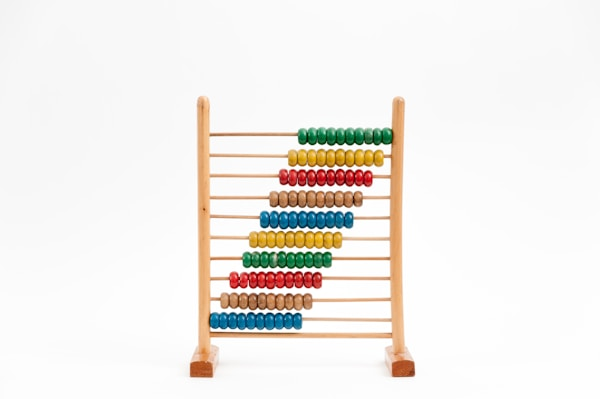

In [40]:
img1 = PIL.Image.open('Image1.jpg')
display(img1)

In [41]:
imgPrompt = """Describe this image:"""

In [42]:
responseimg = model.generate_content([imgPrompt, img1])

In [60]:
type(responseimg)

google.generativeai.types.generation_types.GenerateContentResponse

In [61]:
responseimg.text

' The image shows a wooden abacus with ten rows of beads. The beads are arranged in groups of ten, with each group having one bead of a different color. The beads are arranged in the following order: green, yellow, red, brown, orange, yellow, green, red, brown, and orange.'

In [45]:
imgprompt2 = """
Answer the following questions about this image.
Return the results as a JSON list containing "question" and "answer" pairs.

QUESTIONS:
- What does the image show?
- How does it work?
- When was it invented?
- What's the name of this object in French, Italian, Spanish, Dutch, and German?
- What are the most prominent colors in the image?
"""

In [46]:
responseimg1 = model.generate_content([imgprompt2, img1])

In [77]:
print_responses(responseimg1)

------------------------------ Start of responses ------------------------------


```json
[
  {
    "question": "What does the image show?",
    "answer": "The image shows an abacus."
  },
  {
    "question": "How does it work?",
    "answer": "An abacus works by using beads to represent numbers. The beads are arranged in rows, with each row representing a different place value. To add two numbers, the beads in the corresponding rows are added together. To subtract two numbers, the beads in the corresponding rows are subtracted from each other."
  },
  {
    "question": "When was it invented?",
    "answer": "The abacus was invented in ancient China around 2000 BC."
  },
  {
    "question": "What's the name of this object in French, Italian, Spanish, Dutch, and German?",
    "answer": "The name of this object in French is boulier, in Italian is pallottoliere, in Spanish is √°baco, in Dutch is telraam, and in German is Rechenrahmen."
  },
  {
    "question": "What are the most prominent colors in the image?",
    "answer": "The most prominent colors in the image are red, yellow, green, and blue."
  }
]
```

------------------------------- End of responses -------------------------------



In [50]:
image_tiles_prompt = """
- What expression can be read in this image? How is it presented?
- What is the opposite expression?
- What is a recommendation, starting with this expression, a teacher could give his students for an exam?
- With the opposite expression?
"""

In [51]:
img2 = PIL.Image.open('Image2.jpg')
display(img2)

In [52]:
responseimage_tiles = model.generate_content([image_tiles_prompt, img2])

In [83]:
print_responses(responseimage_tiles)

------------------------------ Start of responses ------------------------------


- The expression is "In the beginning". It is presented using wooden tiles with letters on them.
- The opposite expression is "In the end".
- A recommendation for an exam starting with "In the beginning" could be: "In the beginning, take a deep breath and relax. Read the instructions carefully and answer the questions to the best of your ability."
- A recommendation for an exam starting with "In the end", could be: "In the end, check your work carefully and make sure you have answered all of the questions. Don't forget to hand in your exam on time."

------------------------------- End of responses -------------------------------



In [54]:
Img3prompt = """
Follow the instructions.
Write math expressions in LaTex.
Use a table with a row for each instruction and its result.

INSTRUCTIONS:
- Extract the formula.
- What is the symbol right before Pi? What does it mean?
- Is this a famous formula? Does it have a name?
- Why is it special?
- Extract the caption.
- What's the object in the bottom?
- What was it used for?
- What colors are the caption and the formula?
"""

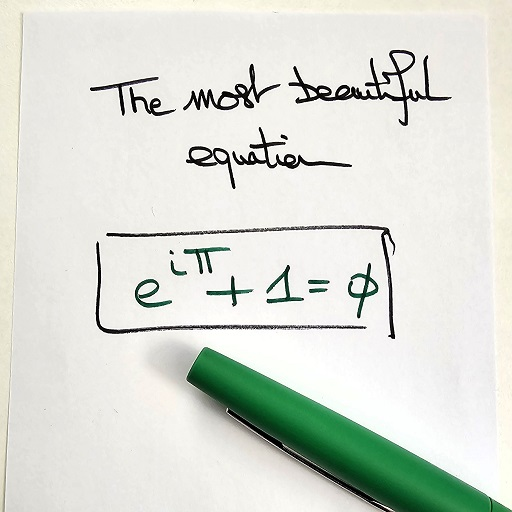

In [55]:
img3 = PIL.Image.open('Image3.jpg')
display(img3)

In [85]:
responseimage3 = model.generate_content([Img3prompt, img3])

In [86]:
print_responses(responseimage3)

------------------------------ Start of responses ------------------------------


| INSTRUCTIONS                                             | RESULT                                                                                                                                |
|----------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------|
| Extract the formula.                                      | \(e^{i\pi}+1=0\)                                                                                                                            |
| What is the symbol right before Pi? What does it mean? | \(i\), the imaginary unit, which is a number that, when multiplied by itself, gives -1.                                                       |
| Is this a famous formula? Does it have a name?              | Yes, it is known as Euler's identity.                                                                                                |
| Why is it special?                                       | It is considered beautiful because it links five fundamental mathematical constants: \(0\), \(1\), \(e\), \(\pi\), and \(i\). |
| Extract the caption.                                     | "The most beautiful equation"                                                                                                         |
| What's the object in the bottom?                           | A green pen.                                                                                                                            |
| What was it used for?                                     | The caption is written with it.                                                                                                      |
| What colors are the caption and the formula?             | The caption is black, and the formula is green.                                                                                             |

------------------------------- End of responses -------------------------------



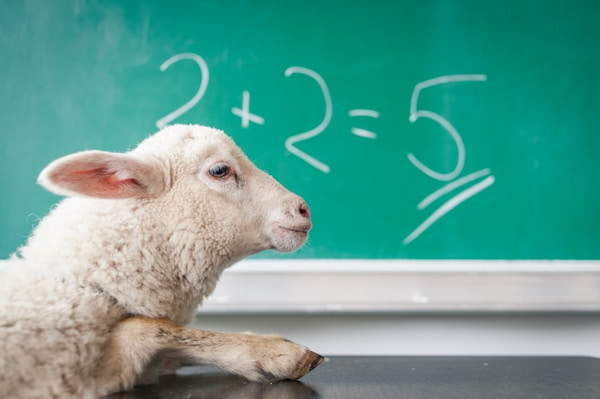

In [87]:
img4 = PIL.Image.open('Image4.jpg')
display(img4)

In [92]:
Img4prompt = """
Answer the following questions about the image.
Present the results in a table with a row for each question and its answer.

QUESTIONS:
- What is visible?
- What are the reasons it's funny?
- What could be a fun caption?
- What could happen next?
- How would you alter the image? Would it still be funny and why?
- How would you make it funnier?
"""

In [93]:
responseimage4 = model.generate_content([Img4prompt, img4])

In [94]:
print_responses(responseimage4)

------------------------------ Start of responses ------------------------------


| Question                                             | Answer                                                                                                      |
|------------------------------------------------------|-------------------------------------------------------------------------------------------------------------|
| What is visible?                                     | A lamb is lying in front of a chalkboard. The lamb is looking at the chalkboard, which has 2 + 2 = 5 written on it. |
| What are the reasons it's funny?                     | The lamb is looking at the chalkboard with a look of disapproval, as if it is questioning the validity of the equation. |
| What could be a fun caption?                          | "Even the lamb knows that 2 + 2 = 4."                                                                   |
| What could happen next?                               | The lamb could turn to the camera and say, "Excuse me, but I think you're wrong. 2 + 2 is 4."                   |
| How would you alter the image? Would it still be funny and why? | I would add a speech bubble to the lamb that says, "Excuse me, but I think you're wrong. 2 + 2 is 4." I think this would make the image funnier because it would make it clear that the lamb is questioning the validity of the equation. |
| How would you make it funnier?                         | I would add a speech bubble to the lamb that says, "Excuse me, but I think you're wrong. 2 + 2 is 4." I think this would make the image funnier because it would make it clear that the lamb is questioning the validity of the equation. |

------------------------------- End of responses -------------------------------

